# **Tutorial 4 part 2 - Policy Gradient**

## **Introduction** 

### **Policy Based Reinforcement Learning**

Suppose you are in a new town and you have no map nor GPS, and you need to reach downtown. You can try assess your current position relative to your destination, as well the effectiveness (value) of each direction you take. You can think of this as computing the value function. Or you can ask a local and he tells you to go straight and when you see a fountain you go to the left and continue until you reach downtown. He gave you a policy to follow.
Naturally, in this case, following the given policy is much less complicated than computing the value function on your own.

In another example, consider that you are managing in inventory, and you decided that when the count of each item drops below a certain limit you issue a buy order to refill your stock. This is a policy that is far more simple than studying the activity of the customers, and their buying habits and preferences, in order to predict the impact on your stock…

Surely enough, value functions will lead to determining a policy as seen in previous articles, but there are other methods that can learn a policy that can select actions using parameters, without consulting a value function (this is not quite correct, since value function is needed to increase accuracy).

So the main idea is to be able to determine at a state (s) which action to take in order to maximize the reward.
The way to achieve this objective is to fine tune a vector of parameters noted 𝜽 in order to select the best action to take for policy 𝜋.


**Advantages**


*   **Better convergence properties**

    <img src="https://cdn-media-1.freecodecamp.org/images/1*0lYcY5TBSqfNwdu8TduB6g.png" 
     width="300" 
     height="200" />
     
     The problem with value-based methods is that they can have a big oscillation while training. This is because the choice of action may change dramatically for an arbitrarily small change in the estimated action values.

    On the other hand, with policy gradient, we just follow the gradient to find the best parameters. We see a smooth update of our policy at each step.

    Because we follow the gradient to find the best parameters, we’re guaranteed to converge on a local maximum (worst case) or global maximum (best case).
    

*   **Effective in high-dimensional or continuous action spaces**
    
    <img src="https://cdn-media-1.freecodecamp.org/images/1*_hAkM4RIxjKjKqAYFR_9CQ.png" 
     width="400" 
     height="400" /><img src="https://media1.giphy.com/media/lMmFXQAiiLYZ9D3loU/200w.gif?cid=82a1493b940fvs26vo6lgcrxe1bz7hvktd7mis150sf48o72&rid=200w.gif&ct=g" 
     width="300" 
     height="200" />
     
    When the space is large, the usage of memory and computation consumption grows rapidly. The policy based RL avoids this because the objective is to learn a set of parameters that is far less than the space count.
    
    The problem with Deep Q-learning is that their predictions assign a score (maximum expected future reward) for each possible action, at each time step, given the current state.

    But what if we have an infinite possibility of actions?

    For instance, with a self driving car, at each state you can have a (near) infinite choice of actions (turning the wheel at 15°, 17.2°, 19,4°, honk…). We’ll need to output a Q-value for each possible action!

    On the other hand, in policy-based methods, you just adjust the parameters directly: thanks to that you’ll start to understand what the maximum will be, rather than computing (estimating) the maximum directly at every step.

*   **Can learn stochastic policies**: 

    Stochastic policies are better than deterministic policies, especially in 2 players game where if one player acts deterministically the other player will develop counter measures in order to win.

**Disadvantages**

*   Typically converge to a local rather than global optimum
*   Evaluating a policy is typically inefficient and high variance
    
    Policy based RL has high variance, but there are techniques to reduce this variance.

## **Blue Print**


Based on:
https://lcalem.github.io/blog/2019/03/21/sutton-chap13

Before delving into the details of math and algorithms, it is useful to have an overview of how to proceed, a kind of blue print:

1.  Define the policy - list the  policy that can be used in the learning process.
1.  Find an objective function which can be used to assess the effectiveness of the policy. In other words telling how good the result given by the policy.
1.  Propose an algorithm that makes direct use of the policies in order to learn the parameters.


### **Part 1: Define Policy**


In policy gradient methods the policy can be parametrized in any way, as long as $\pi(a|s,\theta)$ is differentiable.

Most common parametrization for discrete action space if it’s not too large: form parametrized numerical preferences for each state-action pair, and in each state we can use a softmax (softmax in action preferences):

#### **Softmax Policy**

The softmax Policy consists of a softmax function that converts output to a distribution of probabilities. Which means that it affects a probability for each possible action.
Softmax is mostly used in the case discrete actions:

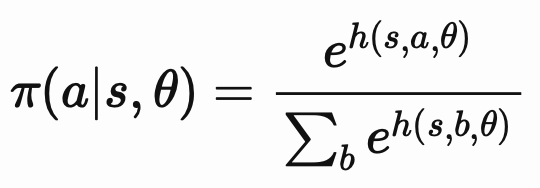

     
The action preferences can be computed with a neural network or simply be linear in features, 
$h(s,a,\theta )= {\theta}^T X(s,a)$

Where $X(s,a) $ is the feature vector, the input related to the state and action.

### **Part 2: Finding the Objective Function**

**Objective Function**
When talking about maximizing a function, one of the methods that stands out, is the gradient.
But how are we going to maximize the rewards based on 𝜽 ?
One way to do it, is to find an objective function J(𝜽) such that: 
$J(\theta ) = v_{\pi_{\theta}}(s_0)$ 

In short the maximizing J(𝜽) means maximizing $v_{\pi_{\theta}}(s_0)$.

It follows that

$∇ J(\theta) = ∇v_{\pi_{\theta}}(s_0)$ 

According to the Policy Gradient theorem

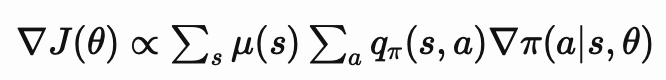
    
Where 𝝻(s) is the distribution under 𝜋 (meaning the probability of being at state s when following policy 𝜋), q(s,a) is the action value function under 𝜋, and ∇𝜋(a|s, 𝜽) is the gradient of 𝜋 given s and 𝜽.

So the theorem says that ∇J(𝜽) is proportional to the sum of the q function times the gradient of the policies for all actions at the states that we might be at. 

However we don’t know 𝜋(a|s,𝜽), how can we find its gradient?

It turns out that it is possible, as the following demonstration shows:

Since the right hand side of the policy gradient theorem is a sum over states weighted by how often the states occur under the target policy we can use the Expected value: 

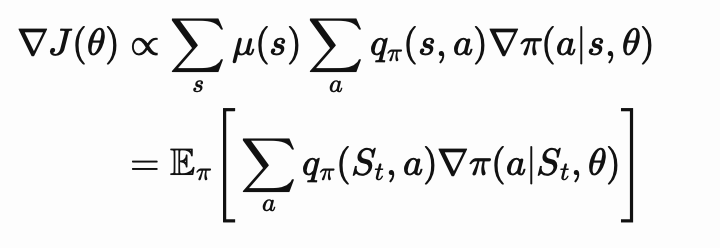

Now we need to sample the action (replacing a with the sample action $A_t$)

Sum over actions -> if only each term would be weighted by the probability of selecting the actions according to the policy, the replacement could be done:

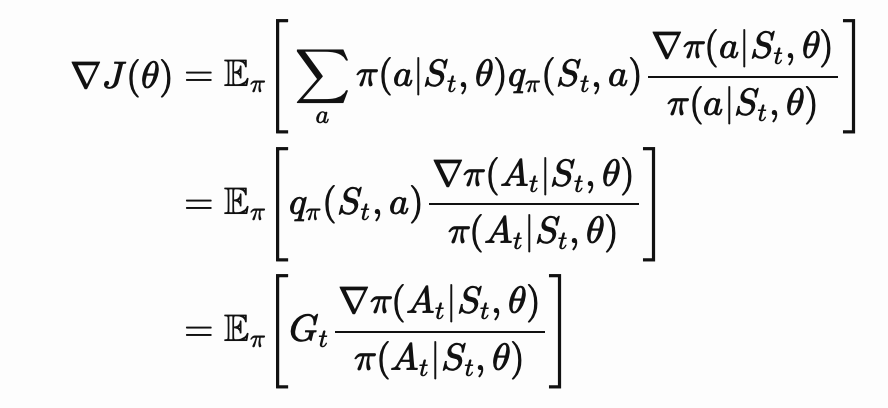

This final expression is exactly what we need: a quantity that can be sampled on each time step whose expectation is equal to the gradient.

Thus, the Stochastic gradient ascent update:

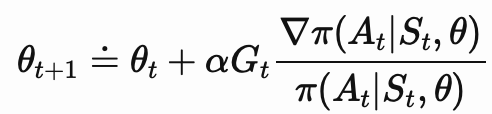


And we have the REINFORCE algorithm!

* each increment is proportional to the product of the return and the gradient of the probability of taking the action actually taken, divided by the probablity of taking that action
* the vector is the direction in parameter space that most increase the probability of taking that action
* favors updates in the direction that yields the highest return

The Algorithm will use the fact that 

$∇ln(x) = {∇x}/x $

along with the notation that 

$∇ln(\pi_{\theta}(s,a)) = X(s,a) - E_{\pi_{\theta}}[X(s,\cdot)]$


### **Part 3: Naive Algorithm**



#### **REINFORCE (Monte-Carlo Policy Gradient)**
This algorithm uses Monte-Carlo to create episodes according to the policy 𝜋𝜃, and then for each episode, it iterates over the states of the episode and computes the total return G(t). The it uses G(t) and ∇Log 𝜋𝜃(s,a) (which can be Softmax policy or other) to learn the parameter 𝜃.

<img src="https://miro.medium.com/max/1400/1*NAmPwZdNUDcMcuAtr-Xrfw.png" 
     width="500" 
     height="200" />

## Importing the dependencies 📚

First, we need to import the libraries that we'll need inorder to create our agent.

In [4]:
import numpy as np
import gym
import random
from AI_agents.RL.policy_gradient import *
from AI_agents.RL.train_and_evaluate import *

## Utilities 🗄️

In [5]:
def run(env, is_env_multiagent, agents, max_episode_len, num_episodes, method, display, save_rate, agents_save_path, train_result_path):

    if agents_save_path: import dill # used to save the agents themselves, pickle bad at serializing objecst
    if train_result_path: import pickle 

    episode_rewards = [0.0]
    agent_rewards = [[0.0] for _ in range(len(agents))]
    final_ep_rewards = []
    final_ag_ep_rewards = [[] for _ in range(len(agents))]

    episode_step = 1
    train_steps = 0
    
    print("Starting iterations...")
    t_time = time.time()
    for i in range(num_episodes):
        if is_env_multiagent:
            ep_results = run_episode_multi_agent(env, agents, max_episode_len, method, display) 
        else:
            ep_results = run_episode_single_agent(env, agents[0], max_episode_len, method, display) 

        t_reward, a_rewards, t_steps = ep_results
        train_steps += t_steps

        episode_rewards[-1] += t_reward
        for (idx, a_reward) in enumerate(a_rewards):
            agent_rewards[idx][-1] += a_reward

        for agent in agents:
            agent.episode_callback()

        if len(episode_rewards) % save_rate == 0:
            final_ep_rewards.append(np.mean(episode_rewards[-save_rate:]))
            for i, rew in enumerate(agent_rewards):
                final_ag_ep_rewards[i].append(np.mean(rew[-save_rate:]))
            
            
            print("steps: {}, episodes: {}, mean episode reward:{}, time:{}".format(
                train_steps, len(episode_rewards), final_ep_rewards[-1], time.time() - t_time
            ))

            if agents_save_path: # if save path provided, save agents to agents_save_path
                with open(agents_save_path, "wb") as fp:
                    pickle.dump(agents, fp)
            
            if train_result_path: # if train_result_path provided, save results to train_result_path
                save_obj = dict()
                
                save_obj["final_ep_rewards"] = final_ep_rewards 
                save_obj["final_ag_ep_rewards"] = final_ag_ep_rewards
                save_obj["all_ep_rewards"] = episode_rewards 
                save_obj["all_ag_rewards"] = agent_rewards 

                with open(train_result_path, "wb") as fp:
                    pickle.dump(save_obj, fp)

            t_time = time.time()

        episode_rewards.append(0)
        for (idx, a_reward) in enumerate(a_rewards):
            agent_rewards[idx].append(0)

        episode_step += 1
    
    print("Finished a total of {} episodes.".format(len(episode_rewards)))
    
    if agents_save_path:
        print("Agent saved to {}.".format(agents_save_path))

    if train_result_path:
        # final_ep_rewards, final_ag_rewards, episode_rewards, agent_rewards 
        print("Train results saved to {}.".format(train_result_path))

In [6]:
def train(env, is_env_multiagent, agents, max_episode_len, num_episodes, display, save_rate, agents_save_path, train_result_path):
    method = 'train'
    run(env, is_env_multiagent, agents, max_episode_len, num_episodes, method, display, save_rate, agents_save_path,
          train_result_path)
    print("training done")

In [7]:
def evaluate(env, is_env_multiagent, agents, max_episode_len, num_episodes, display, save_rate, agents_save_path, train_result_path):
    method = 'evaluate'
    run(env, is_env_multiagent, agents, max_episode_len, num_episodes, method, display, save_rate, agents_save_path,
          train_result_path)
    print("evaluating done")

In [8]:
def run_episode_single_agent(env, agent, max_episode_len, method, display):
    """ Runs an episode of a single_agent environment """
    obs = env.reset()
    total_rewards = 0.0 # total rewards is agent rewards 
    train_steps = 0

    for _ in range(max_episode_len):
        if display:
            env.render() 
            time.sleep(0.15)

        action = agent.action_callback(obs)  
        new_obs, reward, done, info = env.step(action) 

        if method == 'train':
            agent.experience_callback(obs, action, new_obs, reward, done)

        total_rewards += reward 

        obs = new_obs 
        train_steps += 1
    
        if done:
            break 

    return total_rewards, [total_rewards], train_steps 

## Policy Gradient Class

In [9]:
class PolicyGradientAgent(object):
    """ Generic Policy Gradient Implementation """

    def __init__(self, num_actions, theta, alpha=0.00025, gamma=0.9, mapping_fn=None, action_return_format=None):
        """ Parameters """
        self.theta = theta
        self.alpha = alpha
        self.gamma = gamma

        """ Record keeping / episode """
        self.grads = []
        self.rewards = []

        self.mapping_fn = mapping_fn
        self.num_actions = num_actions
        # environment may want vector instead. Can define on environment but it has some consequences depending on which
        # environment you are working with. This may be a bit more general, but should think about whether it is better on the
        # environment.
        self.action_return_format = action_return_format

    def int_to_vector(self, action):
        """ Turns integer action into one hot vector """
        vec = np.zeros(self.num_actions)
        vec[action] = 1
        return vec

    def softmax(self, state):
        """ softmax(state * weights) """
        z = state.dot(self.theta)
        exp = np.exp(z - np.max(z))
        return exp / np.sum(exp)

    def policy(self, state):
        """ Returns agent policy given state """
        probs = self.softmax(state)
        return probs

    def softmax_gradient(self, softmax):
        """ Derivative of the softmax w.r.t. theta """
        s = softmax.reshape(-1, 1)
        return np.diagflat(s) - np.dot(s, s.T)

    def compute_gradient(self, probs, state, action):
        """ Computes the gradient of log(softmax) for a state and action """
        dsoftmax_comp = self.softmax_gradient(probs)
        dsoftmax = dsoftmax_comp[action, :]
        dlog = dsoftmax / probs[0, action]
        grad = state.T.dot(dlog[None, :])

        self.grads.append(grad)
        return

    def update_weights(self):
        """ Update weights """
        for i in range(len(self.grads)):
            present_val_of_rewards = sum([r * (self.gamma ** r) \
                                          for t, r in enumerate(self.rewards[i:])])
            self.theta += self.alpha * self.grads[i] * present_val_of_rewards
        return

    """ Training Callbacks """

    def action_callback(self, state):
        """ Take an action according to policy. Save gradient."""
        if self.mapping_fn:
            state = self.mapping_fn(state)

        state = state[None, :]
        probs = self.policy(state)

        action = np.random.choice(self.num_actions, p=probs[0])

        self.compute_gradient(probs, state, action)
        if self.action_return_format == 'vector':
            return self.int_to_vector(action)

        return action

    def experience_callback(self, obs, action, new_obs, reward, done):
        """ Receive rewards """
        self.rewards.append(reward)

    def episode_callback(self):
        """ Update weights, reset records for new episodes"""
        self.update_weights()

        self.grads = []
        self.rewards = []

    """ Evaluation callbacks """

    def policy_callback(self, state):
        """ Take an action according to policy."""
        if self.mapping_fn:
            state = state.mapping_fn(state)

        state = state[None, :]
        probs = self.policy(state)
        action = np.random.choice(self.num_actions, p=probs[0])

        if self.action_return_format == 'vector':
            return self.int_to_vector(action)

        return action

    def reset(self):
        """ Reset records for new episodes """
        return

## Policy Gradient for OpenAI Taxi-v3 🚕 

In [10]:
#creating the evn
env = gym.make("Taxi-v3").env  
env.reset()

env.render()

#computing theta
num_actions = env.action_space.n
num_states = env.observation_space.n
theta = np.random.rand(num_states, num_actions)

#creating the agent
pg_agent = PolicyGradientAgent(num_actions, theta, alpha=0.025, gamma=0.9,
                              mapping_fn=lambda x: np.squeeze(np.eye(500)[np.array(x).reshape(-1)]) / 500)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [20]:
#train the agent
train(env=env, is_env_multiagent=False, agents=[pg_agent], max_episode_len=100, num_episodes=100,
            display=False, save_rate=1, agents_save_path="", train_result_path="")

Starting iterations...
steps: 100, episodes: 1, mean episode reward:-388.0, time:0.03762006759643555
steps: 200, episodes: 2, mean episode reward:-343.0, time:0.09437799453735352
steps: 245, episodes: 3, mean episode reward:-150.0, time:0.010930061340332031
steps: 345, episodes: 4, mean episode reward:-451.0, time:0.021860837936401367
steps: 445, episodes: 5, mean episode reward:-316.0, time:0.0207822322845459
steps: 545, episodes: 6, mean episode reward:-361.0, time:0.0221099853515625
steps: 645, episodes: 7, mean episode reward:-379.0, time:0.02241683006286621
steps: 745, episodes: 8, mean episode reward:-523.0, time:0.030951261520385742
steps: 845, episodes: 9, mean episode reward:-433.0, time:0.021728992462158203
steps: 945, episodes: 10, mean episode reward:-379.0, time:0.02016305923461914
steps: 1045, episodes: 11, mean episode reward:-442.0, time:0.022346019744873047
steps: 1145, episodes: 12, mean episode reward:-343.0, time:0.019583940505981445
steps: 1245, episodes: 13, mean 

In [21]:
#evaluate the agent
evaluate(env=env, is_env_multiagent=False, agents=[pg_agent], max_episode_len=100, num_episodes=20,
            display=True, save_rate=1, agents_save_path="", train_result_path="")


Starting iterations...
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : 

KeyboardInterrupt: 

## Policy Gradient for OpenAI Simple Speaker Listener Environment 🗣👂

In [22]:
from pettingzoo.mpe import simple_speaker_listener_v3
import numpy as np
import time
import pickle as pickle
import gym
import random

In [23]:
from pettingzoo.mpe import simple_v2
# use a different wrapper base class for parallel environments
from pettingzoo.utils.wrappers import BaseParallelWraper

class SingleAgentParallelEnvGymWrapper(BaseParallelWraper):
    """
    A wrapper for single-agent parallel environments aligning the environments'
    API with OpenAI Gym.
    """

    def reset(self):
        # run `reset` as usual.
        # returned value is a dictionary of observations with a single entry
        obs = self.env.reset()

        # return the single entry value as is.
        # no need for the key (only one agent)
        return next(iter(obs.values()))

    def step(self, action):
        # step using "joint action" of a single agnet as a dictionary
        step_rets = self.env.step({self.env.agents[0]: action})

        # unpack step return values from their dictionaries
        return tuple(next(iter(ret.values())) for ret in step_rets)

    @property  # make property for gym-like access
    def action_space(self, _=None):  # ignore second argument in API
        # get action space of the single agent
        return self.env.action_space(self.env.possible_agents[0])

    @property  # make property for gym-like access
    def observation_space(self, _=None):  # ignore second argument in API
        # get observation space of the single agent
        return self.env.observation_space(self.env.possible_agents[0])
    
simple_gym_env = simple_v2.parallel_env(max_cycles=5, continuous_actions=False)
simple_gym_env = SingleAgentParallelEnvGymWrapper(simple_gym_env)

In [1]:
env = simple_gym_env
num_actions = env.action_space.n
num_states_vars = env.observation_space.shape[0]
theta = np.random.rand(num_states_vars, num_actions)

#creating the agent
pg_agent = PolicyGradientAgent(num_actions, theta, alpha=0.025, gamma=0.9, mapping_fn=None)

NameError: name 'simple_gym_env' is not defined

In [26]:
#train the agent

train(env=env, is_env_multiagent=False, agents=[pg_agent], max_episode_len=100, num_episodes=2000, display=False, save_rate=10, agents_save_path="", train_result_path="")

Starting iterations...
steps: 50, episodes: 10, mean episode reward:-5.927747917507572, time:0.016088008880615234
steps: 100, episodes: 20, mean episode reward:-4.503048019888588, time:0.010753870010375977
steps: 150, episodes: 30, mean episode reward:-7.012425278698691, time:0.05156207084655762
steps: 200, episodes: 40, mean episode reward:-5.344684193511877, time:0.012432098388671875
steps: 250, episodes: 50, mean episode reward:-7.545614018084789, time:0.018062114715576172
steps: 300, episodes: 60, mean episode reward:-9.229377235101289, time:0.00999593734741211
steps: 350, episodes: 70, mean episode reward:-3.518594234151881, time:0.01744222640991211
steps: 400, episodes: 80, mean episode reward:-8.5221182517766, time:0.009945154190063477
steps: 450, episodes: 90, mean episode reward:-7.773628243738112, time:0.009447097778320312
steps: 500, episodes: 100, mean episode reward:-6.427921365955671, time:0.009615898132324219
steps: 550, episodes: 110, mean episode reward:-7.200838788934

In [27]:
#evaluate the agent

evaluate(env=env, is_env_multiagent=False, agents=[pg_agent], max_episode_len=100, num_episodes=100, display=True, save_rate=10, agents_save_path="", train_result_path="")

Starting iterations...


2022-04-12 08:22:59.108 python[54555:5904916] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ffdec608b10>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-12 08:22:59.109 python[54555:5904916] Warning: Expected min height of view: (<NSButton: 0x7ffdec61c700>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-12 08:22:59.112 python[54555:5904916] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ffdec61edf0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-04-12 08:22:59.114 python[54555:5904916] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7ffdec628970>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


steps: 50, episodes: 10, mean episode reward:-5.7752460945606, time:8.846076965332031
steps: 100, episodes: 20, mean episode reward:-4.049427120729538, time:7.68319296836853
steps: 150, episodes: 30, mean episode reward:-7.063035297847255, time:7.681308031082153
steps: 200, episodes: 40, mean episode reward:-5.462201990533079, time:7.659837961196899
steps: 250, episodes: 50, mean episode reward:-4.332827821516974, time:7.658785104751587
steps: 300, episodes: 60, mean episode reward:-3.0338969540237573, time:7.678699016571045
steps: 350, episodes: 70, mean episode reward:-8.610244854239534, time:7.68048882484436
steps: 400, episodes: 80, mean episode reward:-8.965491626316586, time:7.6794469356536865
steps: 450, episodes: 90, mean episode reward:-4.466993572385721, time:7.680461883544922
steps: 500, episodes: 100, mean episode reward:-6.333154158246457, time:7.671009063720703
Finished a total of 101 episodes.
evaluating done
